In [226]:
# Necessary imports
#! pip install datetime
import pandas as pd
import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px


#ML libraries
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE



In [57]:
# defince a constant for the sol base unit of 1000000000
SOL_BASE = 1000000000


In [179]:
bare_rarity = pd.read_csv("./data/okay_bear/OkayBears_traits.csv")
trait_list = ['Background',	'Clothes','Eyes','Eyewear','Fur','Hat','Mouth']
bare_rarity['trait_n'] = bare_rarity[trait_list].count(axis=1)

bare_rarity.head(2)

,Unnamed: 0,name,Background,Clothes,Eyes,Eyewear,Fur,Hat,Mouth,Background_rarity,...,mean_rarity,factoral_rarity,rarity_rank,id,tokenAddress,collectionAddress,collectionName,imageUrl,chain,trait_n
0,0,Okay Bear #9335,White,Vintage Shirt,Sarcastic,Pixel Glasses,Robot,Skate Cap,Cassette,0.1265,...,0.049329,696.337982,1,9335,5LvxA3HTkHFJRPHjBtBW4sUGA9j55i8Ep4VPcL8WC7HL,7ttWYWpc9H9NUQnEaH64qWLwXcHMYwFBu1WrtwjyAHC3,Okay Bears,https://bafybeihinvpvgwjp5zifaabhymbe3kzmfmsrr...,SOL,7
1,1,Okay Bear #4396,Yellow,Puffer Jacket,Sarcastic,NaN,Blueprint,Rabbit Fur Hat,Cassette,0.1222,...,0.133629,645.035863,2,4396,7h5DGoeiNKmn2i4RMCwMQA1AfvLD5mS81qo9m84ReHj7,7ttWYWpc9H9NUQnEaH64qWLwXcHMYwFBu1WrtwjyAHC3,Okay Bears,https://bafybeigmaruz52sy4ccjm5hgnrkhv5n5ygu6z...,SOL,6


In [59]:
sales = pd.read_csv("./data/okay_bear/transactions.csv")
# convert trade time to datetime from epoch
sales["tradeTime"] = pd.to_datetime(sales["tradeTime"], unit="s")
# divide price by SOL_BASE to get price in SOL
sales["price"] = sales["price"] / SOL_BASE
sales.head(7)

,Unnamed: 0,tradeCount,tradeTime,price,dex,signature,name
0,0,2,2022-04-28 10:12:39,64.9999,magiceden,55mnGHHCG1zKYUBqW6d3z8D5RKi7wZEA7ksT1LocKTp6Sg...,Okay Bear #9999
1,1,4,2022-04-28 03:32:02,110.0000,magiceden,JayNLh3WCbdqXfyuYUtWiEsgo6KmsT6SdGSvbdF2x8kqM6...,Okay Bear #9997
2,2,1,2022-04-27 02:37:46,40.6900,magiceden,2aJvuPkBALGWFiY9wHUHoFcTen4VGARpUgj83q7VaPxfNF...,Okay Bear #9996
3,3,7,2022-05-02 00:05:41,90.0000,magiceden,3Wsz379AZ6eyCC1crSMSVyUXWE5tTjTvwRY5Zpxn2UFmNa...,Okay Bear #9995
4,4,1,2022-04-26 20:49:30,10.9900,magiceden,4cSNt1g24CaFeGemPwcpQrn3nKNtPf8ZSWxY8ULSCHepNK...,Okay Bear #9994
5,5,1,2022-05-08 01:52:07,181.5500,magiceden,qUdGhGLkYMK254WGjRi8oFdf8ofNT4SVx7kSS16VMHRqzF...,Okay Bear #9991
6,6,3,2022-05-11 23:07:11,116.0000,magiceden,5ZLYXBsGQreGp2JZmSrjyodF5E6UzBZ1dUof2q8mtgJ8Tu...,Okay Bear #9992


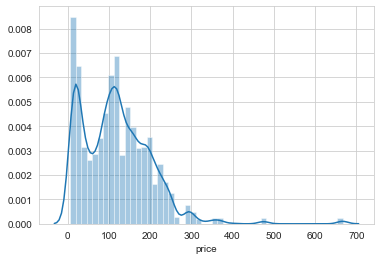

In [286]:
import seaborn as sns
sns.distplot( a=sales.price, hist=True, kde=True, rug=False )

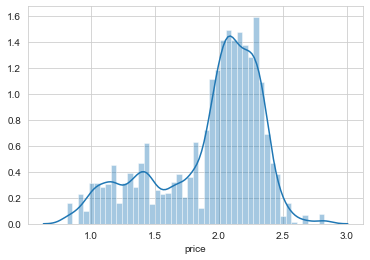

In [288]:
sns.set_style('whitegrid')
sns.distplot( a=np.log10(sales.price), hist=True, kde=True, rug=False )

In [189]:
sales["tradeTime"].min()

Timestamp('2022-04-26 20:26:49')

In [194]:
sales["tradeTime"].min()

Timestamp('2022-04-26 20:26:49')

In [193]:
timeDiff = sales["tradeTime"] -  sales["tradeTime"].min()
sales['timeDiff'] = timeDiff.dt.seconds
sales.tail(2)

,Unnamed: 0,tradeCount,tradeTime,price,dex,signature,name,timeDiff
14948,14948,3,2022-06-15 05:48:44,91.00,magiceden,4B43NFnniWLfrQ62bVEKZQq6a4q5qwt3Mot7DS7KkMjGbW...,Okay Bear #9556,33715
14949,14949,1,2022-04-29 22:08:38,139.69,magiceden,5YxUApMMqXAqBUW7G1pKur2gYR9k4Wofs1v9PQzzr32f37...,Okay Bear #9554,6109


In [60]:
# get the first and last trade time
first_trade_time = sales["tradeTime"].min()
last_trade_time = sales["tradeTime"].max()


In [61]:
sales


,Unnamed: 0,tradeCount,tradeTime,price,dex,signature,name
0,0,2,2022-04-28 10:12:39,64.9999,magiceden,55mnGHHCG1zKYUBqW6d3z8D5RKi7wZEA7ksT1LocKTp6Sg...,Okay Bear #9999
1,1,4,2022-04-28 03:32:02,110.0000,magiceden,JayNLh3WCbdqXfyuYUtWiEsgo6KmsT6SdGSvbdF2x8kqM6...,Okay Bear #9997
2,2,1,2022-04-27 02:37:46,40.6900,magiceden,2aJvuPkBALGWFiY9wHUHoFcTen4VGARpUgj83q7VaPxfNF...,Okay Bear #9996
3,3,7,2022-05-02 00:05:41,90.0000,magiceden,3Wsz379AZ6eyCC1crSMSVyUXWE5tTjTvwRY5Zpxn2UFmNa...,Okay Bear #9995
4,4,1,2022-04-26 20:49:30,10.9900,magiceden,4cSNt1g24CaFeGemPwcpQrn3nKNtPf8ZSWxY8ULSCHepNK...,Okay Bear #9994
...,...,...,...,...,...,...,...
14945,14945,2,2022-04-28 05:31:46,60.0000,magiceden,65GQtBV2GXwQyJtzjWc285E9wWfD6NHFMJX7LSTfWePW3J...,Okay Bear #9559
14946,14946,2,2022-05-05 14:34:53,119.0000,magiceden,4hcBE8h9Py7J7hbsDiD6XN8cK78AUEejJxG4qpnsY1QRUj...,Okay Bear #9557
14947,14947,1,2022-06-12 14:00:15,99.0000,magiceden,38ycCBg257Tsum9CUhFcuTfzxSnyjWCikKwWzdkDE2pf85...,Okay Bear #9555
14948,14948,3,2022-06-15 05:48:44,91.0000,magiceden,4B43NFnniWLfrQ62bVEKZQq6a4q5qwt3Mot7DS7KkMjGbW...,Okay Bear #9556


In [196]:

rarity_cols = ['name','Background', 'Clothes', 'Eyes', 'Eyewear', 'Fur',
       'Hat', 'Mouth','Background_rarity', 'Fur_rarity', 'Mouth_rarity',
       'Eyes_rarity', 'Clothes_rarity', 'Eyewear_rarity', 'Hat_rarity',
       'min_rarity', 'max_rarity', 'mean_rarity', 'factoral_rarity',
       'rarity_rank','trait_n']


In [197]:
# join the sales and rarity dataframes on name
sales_rarity = sales.merge(bare_rarity[rarity_cols], on="name")


In [198]:
#remove Okay Bear # from name and convert to int 
sales_rarity["name"] = sales_rarity["name"].str.extract('(\d+)').astype('int')


In [199]:
sales_rarity["name"] 

0        9999
1        9997
2        9997
3        9996
4        9996
         ... 
14945    9555
14946    9555
14947    9556
14948    9556
14949    9554
Name: name, Length: 14950, dtype: int32

In [200]:
# drop columns Unnamed: 0, dex, signature
sales_rarity.drop(columns=["Unnamed: 0", "dex", "signature", "tradeCount", "tradeTime"], inplace=True)


In [201]:

sales_rarity

,price,name,timeDiff,Background,Clothes,Eyes,Eyewear,Fur,Hat,Mouth,...,Eyes_rarity,Clothes_rarity,Eyewear_rarity,Hat_rarity,min_rarity,max_rarity,mean_rarity,factoral_rarity,rarity_rank,trait_n
0,64.9999,9999,49550,Purple,Sleeveless Tee,Okay,Clear Glasses,Tan,Head Cam,Pouting,...,0.2023,0.0286,0.0407,0.0146,0.0146,0.2023,0.095614,156.596581,4813,7
1,110.0000,9997,25513,Warm Grey,Utility Vest,White Glow,NaN,Coral,Classic Cap,Pouting,...,0.0341,0.0197,0.6672,0.0337,0.0072,0.6672,0.143957,266.421651,846,6
2,110.0000,9997,25513,Warm Grey,Utility Vest,White Glow,NaN,Coral,Classic Cap,Pouting,...,0.0341,0.0197,0.6672,0.0337,0.0072,0.6672,0.143957,266.421651,846,6
3,40.6900,9996,22257,White,Okay Tee,Disappointed,Flying Goggles,Dark Brown,Runner Cap,Okay,...,0.0940,0.0273,0.0183,0.0339,0.0183,0.2305,0.093900,151.541637,5157,7
4,40.6900,9996,22257,White,Okay Tee,Disappointed,Flying Goggles,Dark Brown,Runner Cap,Okay,...,0.0940,0.0273,0.0183,0.0339,0.0183,0.2305,0.093900,151.541637,5157,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14945,99.0000,9555,63206,Grey,Double Jacket,Spirited,Pixel Glasses,Dark Brown,Beret,Pouting,...,0.0620,0.0251,0.0320,0.0292,0.0251,0.1268,0.074900,145.406371,5591,7
14946,99.0000,9555,63206,Grey,Double Jacket,Spirited,Pixel Glasses,Dark Brown,Beret,Pouting,...,0.0620,0.0251,0.0320,0.0292,0.0251,0.1268,0.074900,145.406371,5591,7
14947,91.0000,9556,33715,Grey,Cord Tracksuit,Tired,Wayfarer Sunglasses,Grizzly,Black Bucket Hat,Okay,...,0.0454,0.0139,0.0438,0.0412,0.0139,0.2305,0.092129,160.284826,4566,7
14948,91.0000,9556,33715,Grey,Cord Tracksuit,Tired,Wayfarer Sunglasses,Grizzly,Black Bucket Hat,Okay,...,0.0454,0.0139,0.0438,0.0412,0.0139,0.2305,0.092129,160.284826,4566,7


In [202]:
#define target varaible as price in solana 

y = sales_rarity.price
sales_rarity.drop(columns=["price",'name'], inplace=True)


In [206]:
cat_vars = ['Background','Clothes','Eyes','Eyewear','Fur','Hat','Mouth','trait_n']
num_cols = ['Background_rarity', 'Fur_rarity', 'Mouth_rarity',
       'Eyes_rarity', 'Clothes_rarity', 'Eyewear_rarity', 'Hat_rarity',
       'min_rarity', 'max_rarity', 'mean_rarity', 'factoral_rarity',
       'rarity_rank','timeDiff']
sales_rarity.columns


Index(['timeDiff', 'Background', 'Clothes', 'Eyes', 'Eyewear', 'Fur', 'Hat',
       'Mouth', 'Background_rarity', 'Fur_rarity', 'Mouth_rarity',
       'Eyes_rarity', 'Clothes_rarity', 'Eyewear_rarity', 'Hat_rarity',
       'min_rarity', 'max_rarity', 'mean_rarity', 'factoral_rarity',
       'rarity_rank', 'trait_n'],
      dtype='object')

In [207]:
#create binary dummary varaib
x = pd.get_dummies(sales_rarity, columns=cat_vars   )
x.shape

(14950, 179)

In [208]:
#scale numeric variables
ss = StandardScaler()
ss= ss.fit(x[num_cols])
x[num_cols] = ss.transform(x[num_cols])


In [209]:
x

,timeDiff,Background_rarity,Fur_rarity,Mouth_rarity,Eyes_rarity,Clothes_rarity,Eyewear_rarity,Hat_rarity,min_rarity,max_rarity,...,Mouth_Wheat,Mouth_Worried,Mouth_Wry,Mouth_Yawn,Mouth_Yoyo,Mouth_Yum,trait_n_4,trait_n_5,trait_n_6,trait_n_7
0,0.419217,-1.763914,1.091575,0.323135,1.617277,-0.417288,-1.266028,-0.777788,-0.442196,-1.306763,...,0,0,0,0,0,0,0,0,0,1
1,-0.481654,-0.680386,-1.754698,0.323135,-1.201485,-0.541012,0.771186,-0.600410,-1.069774,0.762249,...,0,0,0,0,0,0,0,0,1,0
2,-0.481654,-0.680386,-1.754698,0.323135,-1.201485,-0.541012,0.771186,-0.600410,-1.069774,0.762249,...,0,0,0,0,0,0,0,0,1,0
3,-0.603684,0.348965,0.783812,1.650107,-0.197657,-0.435360,-1.338867,-0.598553,-0.128407,-1.181261,...,0,0,0,0,0,0,0,0,0,1
4,-0.603684,0.348965,0.783812,1.650107,-0.197657,-0.435360,-1.338867,-0.598553,-0.128407,-1.181261,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14945,0.931024,0.240612,0.783812,0.323135,-0.733926,-0.465943,-1.294318,-0.642201,0.448287,-1.642772,...,0,0,0,0,0,0,0,0,0,1
14946,0.931024,0.240612,0.783812,0.323135,-0.733926,-0.465943,-1.294318,-0.642201,0.448287,-1.642772,...,0,0,0,0,0,0,0,0,0,1
14947,-0.174255,0.240612,1.148882,1.650107,-1.012115,-0.621640,-1.255948,-0.530759,-0.501561,-1.181261,...,0,0,0,0,0,0,0,0,0,1
14948,-0.174255,0.240612,1.148882,1.650107,-1.012115,-0.621640,-1.255948,-0.530759,-0.501561,-1.181261,...,0,0,0,0,0,0,0,0,0,1


In [228]:
# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42
)

print(f"train set has {x_train.shape[0]} datapoints and test set has {x_test.shape[0]} datapoints")


train set has 10016 datapoints and test set has 4934 datapoints


In [229]:
x_train[num_cols]

,Background_rarity,Fur_rarity,Mouth_rarity,Eyes_rarity,Clothes_rarity,Eyewear_rarity,Hat_rarity,min_rarity,max_rarity,mean_rarity,factoral_rarity,rarity_rank,timeDiff
14062,-0.815827,0.783812,0.323135,-0.155761,-0.499307,-1.266028,-0.699779,0.244748,-1.642772,-1.316929,-0.221800,0.088191,-0.592178
2199,-0.815827,1.148882,1.650107,1.617277,-0.599398,-1.266028,-0.598553,-0.365869,-1.181261,-0.631578,-0.268820,0.181890,1.368173
2960,-0.003182,0.783812,1.650107,1.617277,-0.318587,0.771186,1.592203,1.347251,0.762249,1.910749,-1.355050,1.588056,-1.266380
4640,-0.815827,0.783812,-0.213090,1.617277,-0.634152,0.771186,-0.675633,-0.577888,0.762249,0.679108,-0.165484,-0.013715,-1.278860
14176,0.240612,1.148882,0.323135,-0.197657,-0.571595,-1.266028,1.592203,-0.196253,-1.006358,-0.555168,-0.576096,0.763233,-0.471722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2.001344,0.783812,-1.073028,-0.155761,-0.282443,-1.329762,-0.600410,-0.823831,-1.616960,-1.597686,0.822041,-1.264629,0.343211
13418,0.240612,1.148882,1.650107,0.420728,-0.670296,0.771186,-0.834438,-0.959524,0.762249,0.915658,1.003995,-1.370638,-0.249437
5390,0.348965,1.091575,-0.058648,1.617277,-0.435360,0.771186,1.592203,0.634864,0.762249,1.527526,-1.172326,1.509404,0.649373
860,-0.815827,1.148882,0.323135,-1.253436,-0.282443,0.771186,-0.586480,0.948654,0.762249,0.457196,-0.672739,0.945843,-1.207239


In [230]:
xgb_model = xgb.XGBRegressor(
    n_estimators=2000,
    objective="reg:squarederror",
    nthread=-1,
    max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8,
    seed=42,
)
#fit the model
xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [231]:
#prediction on test set
xgb_ypred = xgb_model.predict(x_test)

In [232]:
#calculate MSE
xgb_mse = MSE(y_test, xgb_ypred)
print(f"XGBoost Mean-squared Error = {xgb_mse} SOL")

XGBoost Mean-squared Error = 2.8885551866462564 SOL


In [233]:
best_n = 30
feat_imp = xgb_model.feature_importances_
sorted_idx = feat_imp.argsort()[::-1][0:best_n]

feat_imp[sorted_idx]

array([0.1932944 , 0.05420384, 0.04748352, 0.0451698 , 0.04380355,
       0.03107346, 0.02625881, 0.02413736, 0.02392763, 0.01938229,
       0.01884054, 0.01510065, 0.01468877, 0.01362965, 0.01332088,
       0.01167825, 0.01146659, 0.01123224, 0.01121952, 0.01115783,
       0.01097458, 0.0097155 , 0.00937774, 0.00900857, 0.0088222 ,
       0.00851938, 0.0079977 , 0.00774126, 0.00773242, 0.00752912],
      dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

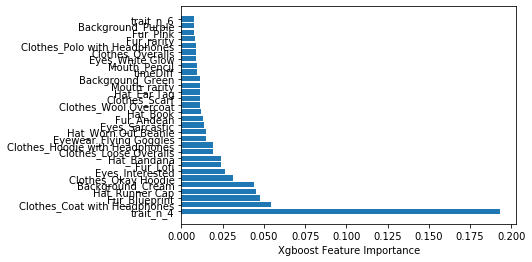

In [234]:
from matplotlib import pyplot as plt 

plt.barh(x_train.columns[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [227]:
fig = px.scatter(x=xgb_ypred, y=y_test)
fig.show()

In [246]:
xgb2 = xgb.XGBRegressor(nthread=-1,seed=42,objective ="reg:squarederror" )

xg_grid = GridSearchCV(xgb2, 
                       param_grid={'n_estimators':[50,100,250,750,1500],
                                    'max_depth': [2,6,10,14],
                                    'subsample':[0.2,0.4,0.6,0.8,0.95],
                                    'colsample_bytree':[0.3,0.5,0.7,0.9],
                                    'eta':[0.01,0.1,0.25,0.5]},
                        cv=10, n_jobs=-1)
#cols to fit
cols2fit = num_cols+['trait_n_4', 'trait_n_5','trait_n_6','trait_n_7']
print(f'cols fitted ={cols2fit}')
#fit the model
xg_grid.fit(x_train[cols2fit], y_train)

#prediction on test set
xgb2_ypred = xg_grid.predict(x_test[cols2fit])
#calculate MSE
xgb2_mse = MSE(y_test, xgb2_ypred)
print('----------------------------------------------------------')
print(f"XGBoost GridSearchCV Mean-squared Error = {xgb2_mse} SOL")


cols fitted =['Background_rarity', 'Fur_rarity', 'Mouth_rarity', 'Eyes_rarity', 'Clothes_rarity', 'Eyewear_rarity', 'Hat_rarity', 'min_rarity', 'max_rarity', 'mean_rarity', 'factoral_rarity', 'rarity_rank', 'timeDiff', 'trait_n_4', 'trait_n_5', 'trait_n_6', 'trait_n_7']
----------------------------------------------------------
XGBoost GridSearchCV Mean-squared Error = 2.427286422010445 SOL


In [247]:
xg_grid.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.5,
 'max_depth': 6,
 'n_estimators': 1500,
 'subsample': 0.2}

In [250]:
xg_grid.best_score_

0.9999961069959463

Text(0.5, 0, 'Xgboost Feature Importance')

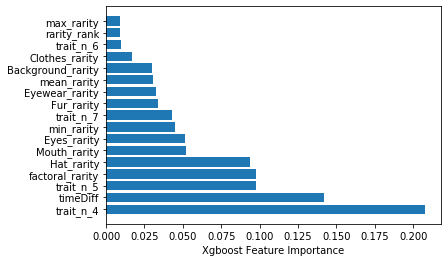

In [251]:

feat_imp = xg_grid.best_estimator_.feature_importances_
sorted_idx = feat_imp.argsort()[::-1]

plt.barh(x_train[cols2fit].columns[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [252]:
fig = px.scatter(x=xgb2_ypred, y=y_test)
fig.show()

In [254]:
print(f"max = {y.max()}, mean = {y.min()}, mean = {y.mean()}, median = {y.median()}")

max = 666.66, mean = 6.49, mean = 118.69156945758608, median = 112.5


In [269]:
cols2fit
x_predict = bare_rarity.copy()
x_predict['timeDiff'] = sales_rarity.timeDiff.max()
x_predict = pd.get_dummies(x_predict, columns =['trait_n'])
x_predict = x_predict[['name']+cols2fit]
x_predict[num_cols] = ss.transform(x_predict[num_cols])
pred_SOL = xg_grid.predict(x_predict[cols2fit])
bare_rarity['predicted_SOL'] = pred_SOL
bare_rarity = bare_rarity.sort_values('predicted_SOL', ascending=False )
predict_SOL = bare_rarity[['name']+trait_list+['trait_n','mean_rarity','rarity_rank','predicted_SOL']].copy()
predict_SOL.head(20)

,name,Background,Clothes,Eyes,Eyewear,Fur,Hat,Mouth,trait_n,mean_rarity,rarity_rank,predicted_SOL
52,Okay Bear #9638,Warm Grey,NaN,Interested,NaN,Tan,NaN,Cassette,4,0.209586,53,645.875732
9041,Okay Bear #9989,Green,NaN,White Glow,NaN,Tan,NaN,Oou,4,0.208857,9042,465.047455
9341,Okay Bear #2373,Blue,NaN,White Glow,NaN,Tan,NaN,Huh,4,0.209786,9342,442.157379
9331,Okay Bear #1726,Warm Grey,NaN,White Glow,NaN,Tan,NaN,Huh,4,0.209429,9332,439.765839
9224,Okay Bear #8057,Yellow,NaN,Closed,NaN,Tan,NaN,Huh,4,0.208914,9225,421.374817
9182,Okay Bear #8352,Cream,NaN,Golden Glow,NaN,Tan,NaN,Clean Smile,4,0.215286,9183,419.339569
9160,Okay Bear #1478,Purple,NaN,Golden Glow,NaN,Grizzly,NaN,Clean Smile,4,0.213686,9161,414.372894
9697,Okay Bear #2362,White,NaN,Closed,NaN,Polar,NaN,Okay,4,0.226514,9698,410.850800
9173,Okay Bear #8134,Blue,NaN,Golden Glow,NaN,Grizzly,NaN,Clean Smile,4,0.214614,9174,410.083466
9806,Okay Bear #9544,Blue,NaN,White Glow,NaN,Sand,NaN,Okay,4,0.229300,9807,403.100006


In [290]:
predict_SOL.predicted_SOL.median()
predict_SOL.to_csv('data/okay_bear/okay_bears_pred.csv')